In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import os, cv2, re, scipy.misc

In [2]:
train_dir = './data/data_road/training'
image_dir = os.path.join(train_dir, 'image_2')
label_dir = os.path.join(train_dir, 'gt_image_2')
label_files = [f for f in os.listdir(label_dir) if 'road' in f]
image_files = [re.sub(r'_(lane|road)_', '_', label_file) 
               for label_file in label_files]
label_files = [os.path.join(label_dir, f) for f in label_files]
image_files = [os.path.join(image_dir, f) for f in image_files]

img = plt.imread(image_files[0])
print("Number of images in training data : ", len(image_files))
print("Image shape : ", img.shape)

Number of images in training data :  289
Image shape :  (375, 1242, 3)


## Data visualization

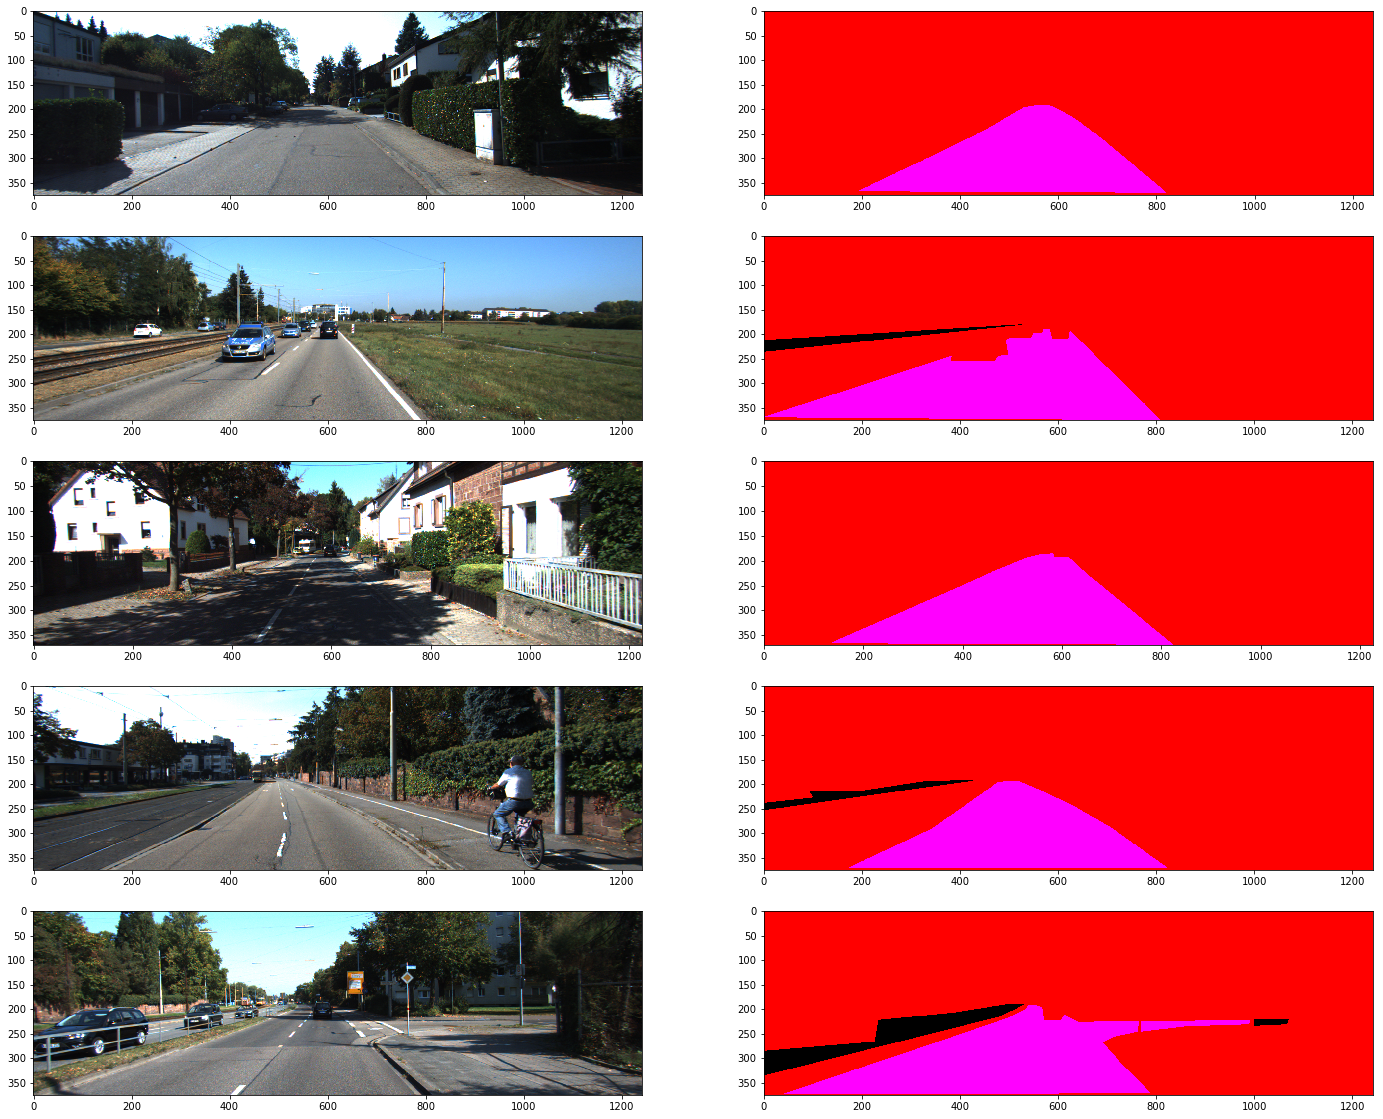

In [3]:
n_display = 5
fig, axes = plt.subplots(n_display, 2, figsize=(24, 4*n_display))
imgs = np.random.randint(len(image_files), size=n_display)
for i, ax in enumerate(axes):
    img = plt.imread(image_files[imgs[i]])
    label = plt.imread(label_files[imgs[i]])
    ax[0].imshow(img)
    ax[1].imshow(label)

## Data Augmentation

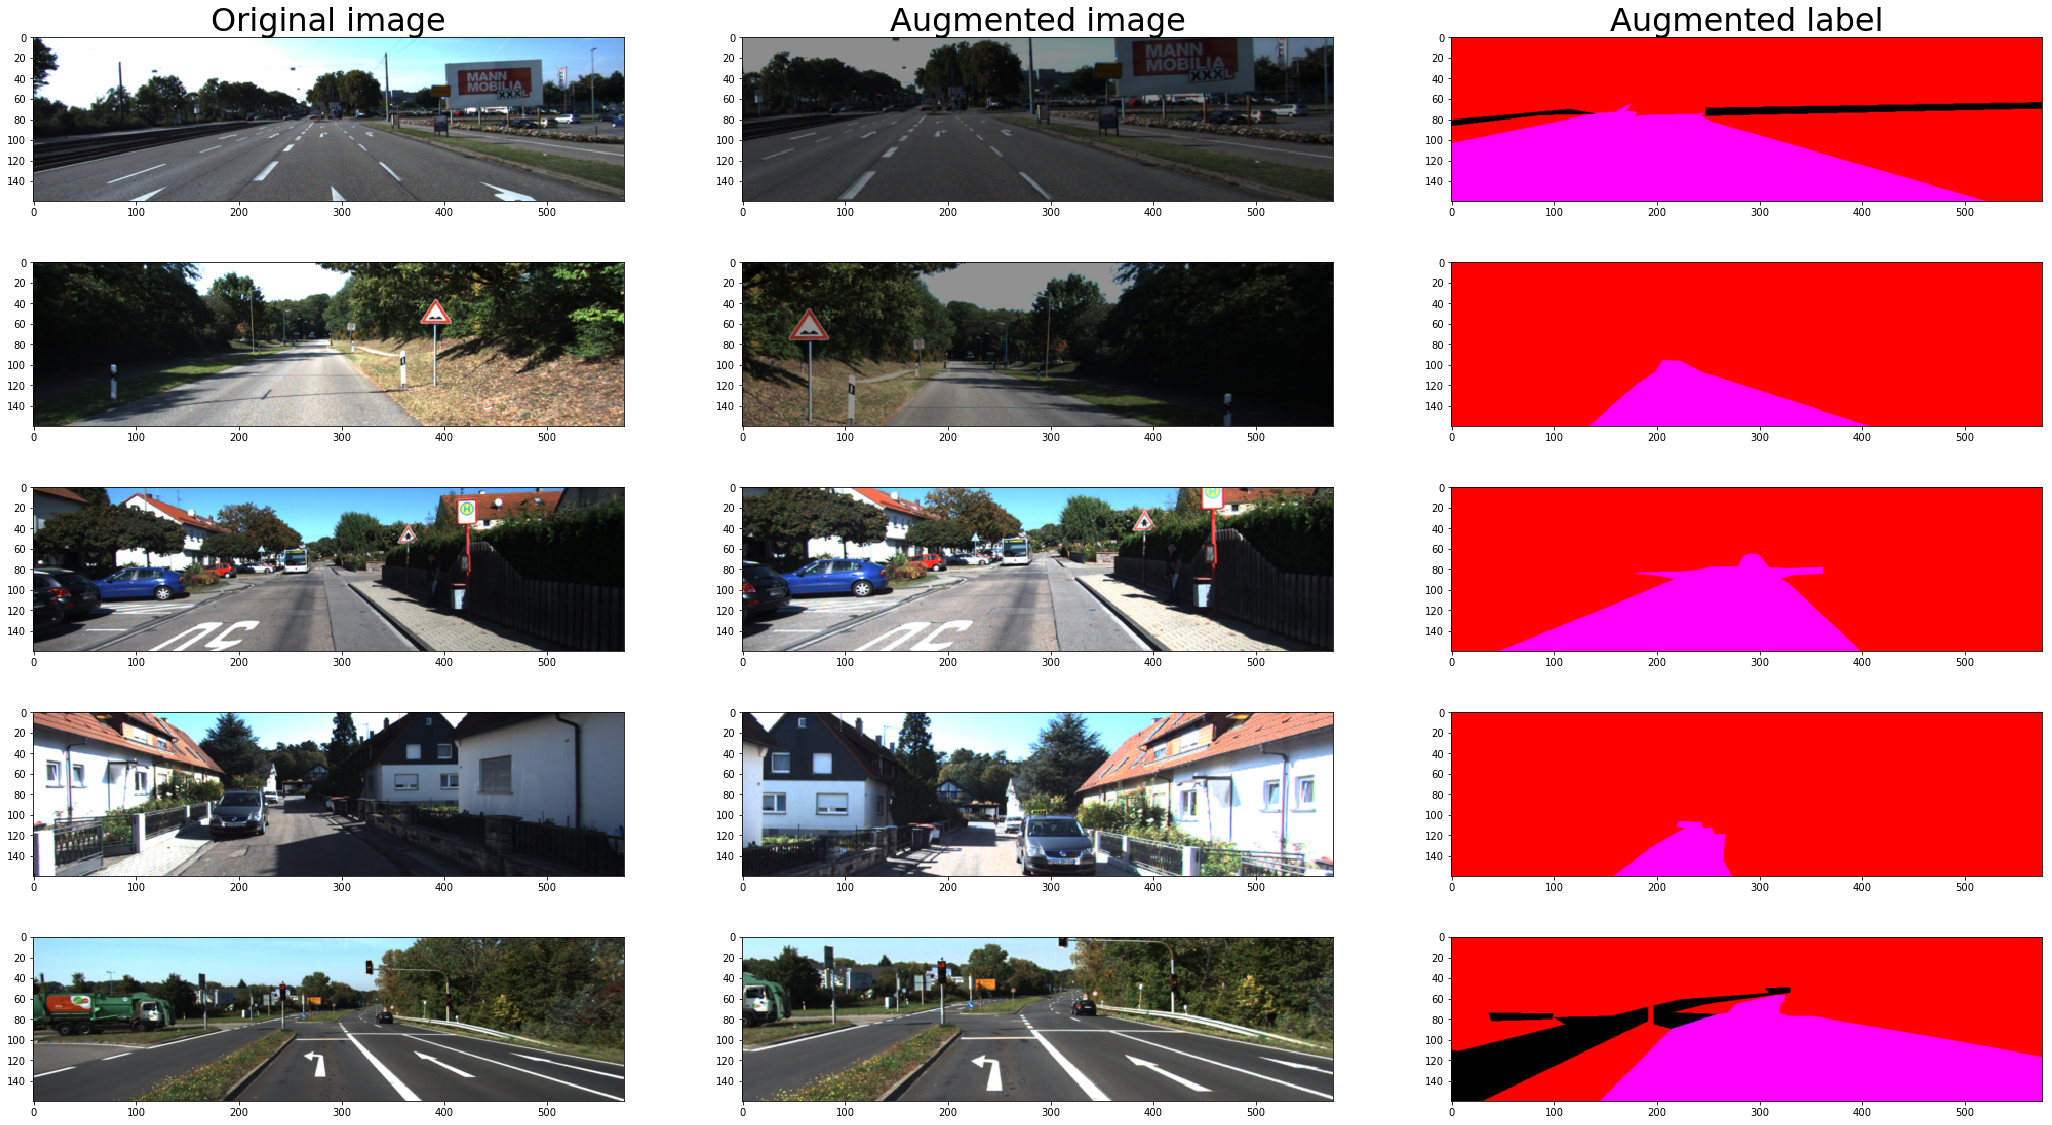

In [5]:
image_shape = (160, 576)

def flip(img, label):
    return cv2.flip(img, 1), cv2.flip(label, 1)

def random_brightness(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv = np.array(hsv, dtype=np.float64)
    random_bright = np.random.uniform(0.3, 1.7)
    hsv[:, :, 2] = hsv[:, :, 2] * random_bright
    hsv[:, :, 2][hsv[:, :, 2] > 255] = 255
    hsv = np.array(hsv, dtype=np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def random_crop(img, label):
    img_h, img_w, _ = img.shape
    aspect_ratio = img_w / img_h
    top = np.random.randint(0, 100)
    bottom = np.random.randint(0, 50)
    left = np.random.randint(0, 350)
    h = img_h - top - bottom
    w = int(aspect_ratio * h)
    if w > img_w - left:
        w = img_w - left
        h = int(w / aspect_ratio)
    return img[top:top+h, left:left+w, :], label[top:top+h, left:left+w, :]
    

fig, axes = plt.subplots(5, 3, figsize=(36, 20))
for i, ax in enumerate(axes):
    idx = np.random.randint(len(image_files))
    
    img = scipy.misc.imread(image_files[idx])
    label = scipy.misc.imread(label_files[idx])
    ax[0].imshow(scipy.misc.imresize(img, image_shape))
    
    if np.random.rand() > 0.5:
        img, label = flip(img, label)
        
    img, label = random_crop(img, label)
    img = random_brightness(img)
    
    img = scipy.misc.imresize(img, image_shape)
    label = scipy.misc.imresize(label, image_shape)
   
    ax[1].imshow(img)
    ax[2].imshow(label)

axes[0,0].set_title('Original image', {'fontsize': 32})
axes[0,1].set_title('Augmented image', {'fontsize': 32})
axes[0,2].set_title('Augmented label', {'fontsize': 32})